# MarlimR3D - Model

Marlim R3D is a realistic resistivity model with corresponding controlled-source electromagnetic data. The model was created by Carvalho and Menezes (2017), and the resulting CSEM data, computed with *SBLwiz* from *EMGS*, was presented by Correa and Menezes (2019). Both model and CSEM data were released under the CC-BY 4.0 license and are available to download on Zenodo.

| Survey                                 |  Model                                 |
|:--------------------------------------:|:--------------------------------------:|
| ![Survey](survey.png "Survey")         | ![Model](model.png "Model")           |
| **Figure 1 of Correa and Menezes (2019):**<br>The CSEM acquisition geometry superimposed on the bathymetric map of the<br>MR3D area. The Marlim reservoir outline is shown in the white line. The<br>yellow dots are the receiver locations distributed in a 1000 m spacing<br>regular grid. The black lines are the source towlines evenly spaced<br> at 1000 m. Source locations are spaced every 100 m along each towline. | **Figure 3 of Correa and Menezes (2019):**<br> Cross section of the MR3D vertical resistivity along the east-west towline<br> 04Tx013. Marlim oil-prone turbidites (M) appear as thin resistive bodies. |



**We edited Figure 1 by marking in red the chosen inline and broadside acquisition lines, and indicating the chosen receiver by a red circle.**

### References

- **B. R. Carvalho and P. T. L. Menezes, 2017**, Marlim R3D: a realistic model
  for CSEM simulations - phase I: model building: Brazilian Journal of Geology,
  47, 633-644; DOI:
  [10.1590/2317-4889201720170088](https://doi.org/10.1590/2317-4889201720170088).
- **Correa, J. L. and P. T. L. Menezes, 2019**, Marlim R3D: A realistic model
  for controlled-source electromagnetic simulations - Phase 2: The
  controlled-source electromagnetic data set: Geophysics, 84(5), E293-E299;
  DOI: [10.1190/geo2018-0452.1](https://doi.org/10.1190/geo2018-0452.1).
- Detailed resistivity model:
  [10.5281/zenodo.400233](https://doi.org/10.5281/zenodo.400233)
- Computational resistivity model (upscaled and extended):
  [10.5281/zenodo.3748492](https://doi.org/10.5281/zenodo.3748492)
- CSEM data with noise:
  [10.5281/zenodo.1256787](https://doi.org/10.5281/zenodo.1256787)
- CSEM data without noise:
  [10.5281/zenodo.1807135](https://doi.org/10.5281/zenodo.1807135)

In [1]:
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Model domain

## Load resistivity cubes

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.extract_model('orig')
```

For this to succeed you have to download the segy-files from [10.5281/zenodo.400233](https://doi.org/10.5281/zenodo.400233) and put them into a folder called `model-marlim/DATA/.`.

In [3]:
data_full = np.load('marlim_orig.npz')
res_h_full = data_full['res_h']
# res_v_full = data_full['res_v']

mesh_full = discretize.TensorMesh(
    h=[data_full['hx'], data_full['hy'], data_full['hz']], origin=data_full['x0'])
mesh_full

TensorMesh: 465,990,098 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x   1022    376,230.90    401,780.90     25.00     25.00    1.00
   y    371  7,504,190.00  7,532,015.00     75.00     75.00    1.00
   z   1229     -6,145.00          0.00      5.00      5.00    1.00

<IPython.core.display.Javascript object>


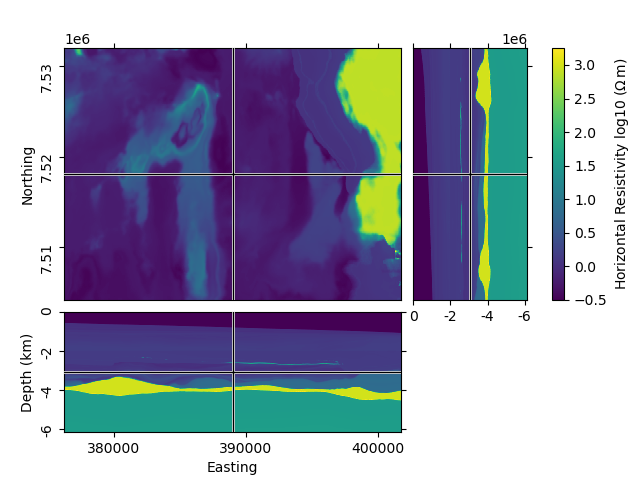

In [4]:
mesh_full.plot_3d_slicer(np.log10(res_h_full))

# Get principal figure axes
fig = plt.gcf()
axs = fig.get_children()

# Adjust the y-labels on the first subplot (XY)
plt.setp(axs[1].yaxis.get_majorticklabels(), rotation=90)
axs[1].set_yticks([7510000, 7520000, 7530000])
axs[1].set_ylabel('Northing')

# Adjust x- and y-labels on the second subplot (XZ)
axs[2].set_xticks([380000, 390000, 400000])
axs[2].set_xlabel('Easting')

plt.setp(axs[2].yaxis.get_majorticklabels(), rotation=90)
axs[2].set_yticks([0, -2000, -4000, -6000])
axs[2].set_yticklabels(['0', '-2', '-4', '-6'])
axs[2].set_ylabel('Depth (km)')

# Adjust x-labels on the third subplot (ZY)
axs[3].set_xticks([0, -2000, -4000, -6000])
axs[3].set_xticklabels(['0', '-2', '-4', '-6'])

# Adjust colorbar
axs[4].set_ylabel(r'Horizontal Resistivity log10 ($\Omega\,$m)')

# Ensure sufficient margins so nothing is clipped
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

# Computation domain

For author used a coarser grid for the actual computation of CSEM responses, that reaches far outside of the fine model above.

## Load resistivity cubes

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.extract_model('comp')
```

For this to succeed you have to download the segy-files from [10.5281/zenodo.3748492](https://doi.org/10.5281/zenodo.3748492) and put them into a folder called `model-marlim/DATA/.`.

In [5]:
data_comp = np.load('marlim_comp.npz')
res_h_comp = data_comp['res_h']
# res_v_comp = data_comp['res_v']

mesh_comp = discretize.TensorMesh(
    h=[data_comp['hx'], data_comp['hy'], data_comp['hz']], origin=data_comp['x0'])
mesh_comp

TensorMesh: 89,882,950 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x    515    364,325.00    415,825.00    100.00    100.00    1.00
   y    563  7,490,049.00  7,546,349.00    100.00    100.00    1.00
   z    310     -6,200.00          0.00     20.00     20.00    1.00

<IPython.core.display.Javascript object>


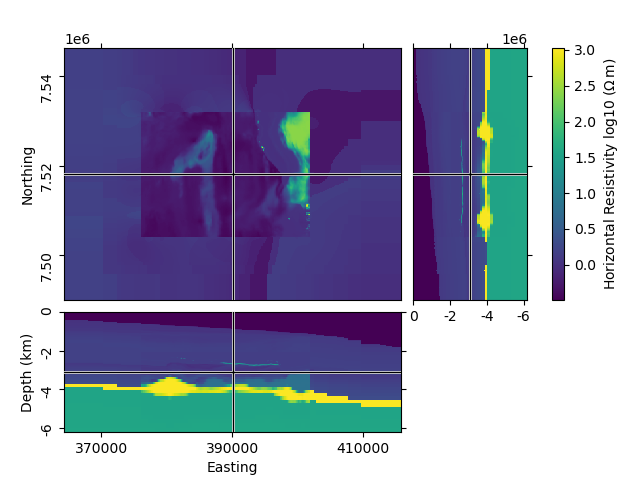

In [6]:
mesh_comp.plot_3d_slicer(np.log10(res_h_comp))

# Get principal figure axes
fig = plt.gcf()
axs = fig.get_children()

# Adjust the y-labels on the first subplot (XY)
plt.setp(axs[1].yaxis.get_majorticklabels(), rotation=90)
axs[1].set_yticks([7500000, 7520000, 7540000])
axs[1].set_ylabel('Northing')

# Adjust x- and y-labels on the second subplot (XZ)
axs[2].set_xticks([370000, 390000, 410000])
axs[2].set_xlabel('Easting')

plt.setp(axs[2].yaxis.get_majorticklabels(), rotation=90)
axs[2].set_yticks([0, -2000, -4000, -6000])
axs[2].set_yticklabels(['0', '-2', '-4', '-6'])
axs[2].set_ylabel('Depth (km)')

# Adjust x-labels on the third subplot (ZY)
axs[3].set_xticks([0, -2000, -4000, -6000])
axs[3].set_xticklabels(['0', '-2', '-4', '-6'])

# Adjust colorbar
axs[4].set_ylabel(r'Horizontal Resistivity log10 ($\Omega\,$m)')

# Ensure sufficient margins so nothing is clipped
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

# CSEM data


### Acquisition parameters

- 500 receivers located on the irregular seafloor.
- For each receiver, sources were located along 45 towlines with a spacing of 1 km; 25 east-west, 20 north-south;
- Source: azimuth and dip 0°, dipole length 278 m, dipole strength 1250 A, 50 m above sea floor.

For our comparison we choose the same receiver as shown in Correa and Menezes (2019), with the inline data and one broadside data.

## Load the two station from Correa and Menezes, 2019, GEO, Figure 4

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.create_survey(store_data=True')
```

For this to succeed you have to download the zip-file `EW_nonoise.zip` from [10.5281/zenodo.1807135](https://doi.org/10.5281/zenodo.1807135) and extract it in a folder called `model-marlim/DATA/.`.

In [7]:
data = xr.load_dataset('marlim_data.nc', engine='h5netcdf')
data

<xarray.Dataset>
Dimensions:     (components: 6, freqs: 6, src_x: 408)
Coordinates:
  * components  (components) object 'Ex' 'Ey' 'Ez' 'Hx' 'Hy' 'Hz'
  * freqs       (freqs) float32 0.125 0.25 0.5 0.75 1.0 1.25
  * src_x       (src_x) float32 379375.0 379375.0 379475.0 ... 401175.0 401175.0
Data variables:
    data_bs     (src_x, freqs, components) float64 -1.004e-14 ... -3.254e-17
    data_il     (src_x, freqs, components) float64 -1.031e-14 ... -6.437e-17
Attributes:
    rec_dip:    0.0
    rec_theta:  0.0
    rec_x:      390275.0
    rec_y:      7517812.0
    rec_z:      -849.7838
    src_dip:    0.0
    src_theta:  0.0
    strength:   1.0

## Plot survey

<IPython.core.display.Javascript object>


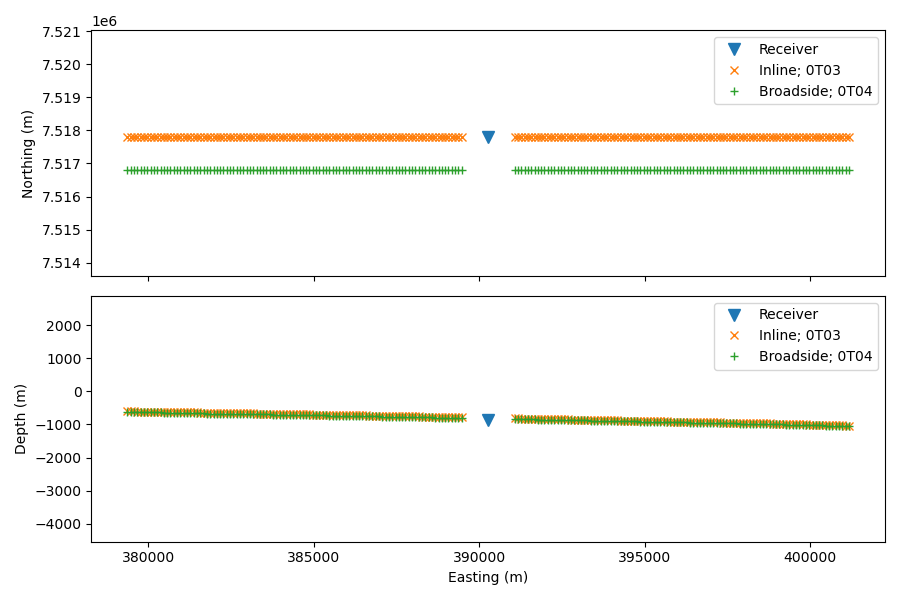

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

ax1.plot(data.attrs['rec_x'], data.attrs['rec_y'], 'v', ms=8, label='Receiver')
ax1.plot(data.src_x[::2], np.ones(data.src_x.size//2)*data.data_il.attrs['src_y'][::2],
         'x', label=f"Inline; {data.data_il.attrs['lineid'][::2]}")
ax1.plot(data.src_x[::2], np.ones(data.src_x.size//2)*data.data_bs.attrs['src_y'][::2],
         '+', label=f"Broadside; {data.data_bs.attrs['lineid'][::2]}")
ax1.legend()
ax1.axis('equal')
ax1.set_ylabel('Northing (m)')

ax2.plot(data.attrs['rec_x'], data.attrs['rec_z'], 'v', ms=8, label='Receiver')
ax2.plot(data.src_x[::2], data.data_il.attrs['src_z'],
         'x', label=f"Inline; {data.data_il.attrs['lineid'][::2]}")
ax2.plot(data.src_x[::2], data.data_bs.attrs['src_z'],
         '+', label=f"Broadside; {data.data_bs.attrs['lineid'][::2]}")
ax2.legend()
ax2.axis('equal')
ax2.set_xlabel('Easting (m)')
ax2.set_ylabel('Depth (m)')

fig.tight_layout()
fig.show()

## Figure 4 from Correa and Menezes (2019), but noise-free data

<IPython.core.display.Javascript object>


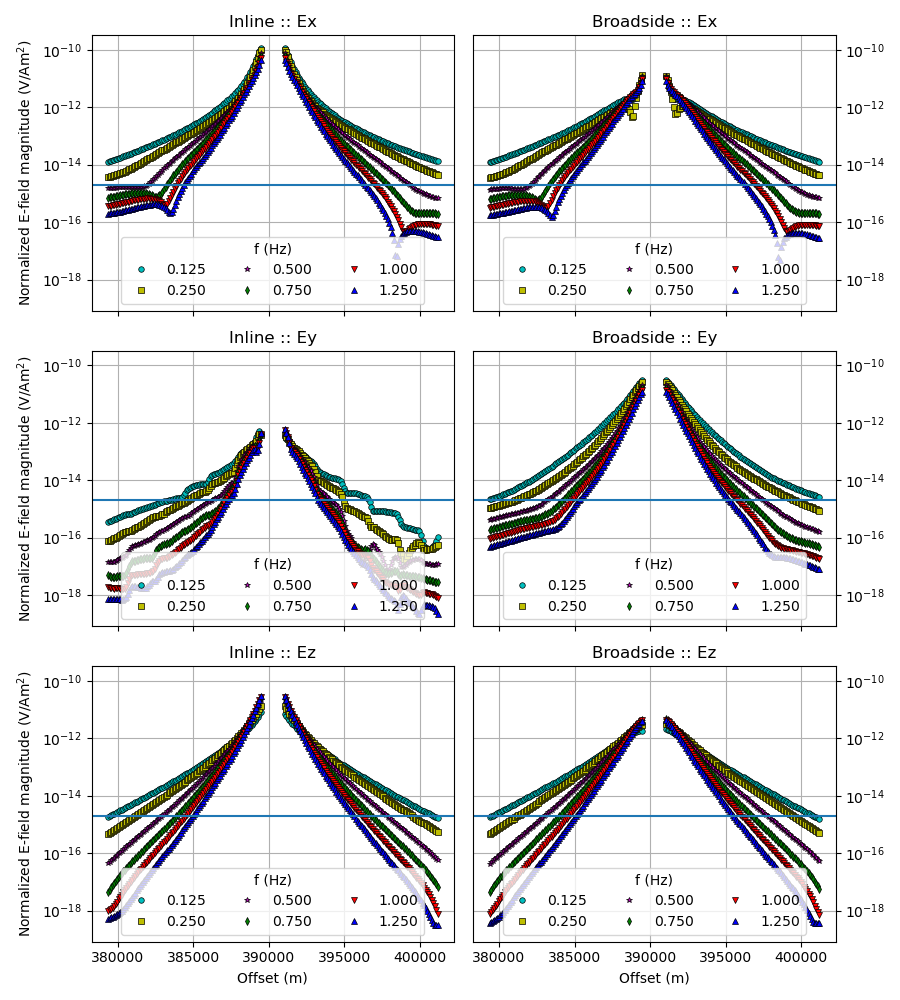

In [9]:
# Line styles
ls = ['co', 'ys', 'm*', 'gd', 'rv', 'b^']

fig, axs = plt.subplots(3, 2, figsize=(9, 10), sharex=True, sharey=True)

# Loop over Inline/Broadside
for iii, datname in enumerate(['data_il', 'data_bs']):

    # Take absolute value
    tdat = np.abs(getattr(data, datname)[::2] + 1j*getattr(data, datname)[1::2])

    # Loop over components Ex, Ey, Ez
    for ii, comp in enumerate(data.components.values[:3]):

        ax = axs[ii, iii]
        ax.set_title(f"{['Inline', 'Broadside'][iii]} :: {comp}")

        # Loop over frequencies
        for i, freq in enumerate(data.freqs.values):

            # Plot this component/frequency
            ax.plot(data.src_x.values[::2], tdat[:, i, ii],
                    ls[i], mec='k', mew=0.5, ms=4, label=f"{freq:4.3f}")

        ax.axhline(2e-15)
        ax.legend(title='f (Hz)', loc='lower center', ncol=3)
        ax.grid('on')
        ax.set_yscale('log')

for ax in axs[-1, :]:
    ax.set_xlabel('Offset (m)')
for ax in axs[:, 0]:
    ax.set_ylabel('Normalized E-field magnitude (V/Am$^2$)')
for ax in axs[:, -1]:
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')

fig.tight_layout()
fig.show()

- **NOTE 1:** The noisy (not the clean) data is show in the paper, without amplitudes < 2e15 (blue lines) 
- **NOTE 2:** Subfigures (e) and (f) are switched in the paper, no idea why.

In [10]:
# Print Version Info (segyio is used in <loadmarlim.py>)
import scooby
scooby.Report([xr, 'segyio', discretize])

--------------------------------------------------------------------------------
  Date: Wed Sep 16 08:30:44 2020 CEST

                OS : Linux
            CPU(s) : 48
           Machine : x86_64
      Architecture : 64bit
               RAM : 503.6 GB
       Environment : Jupyter

  Python 3.8.5 | packaged by conda-forge | (default, Aug 29 2020, 01:22:49)
  [GCC 7.5.0]

            xarray : 0.16.0
            segyio : 1.9.0
        discretize : 0.5.1
             numpy : 1.19.1
             scipy : 1.5.2
           IPython : 7.18.1
        matplotlib : 3.3.1
            scooby : 0.5.6
--------------------------------------------------------------------------------